In [110]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
from PIL import Image
import glob
import os

import matplotlib.pyplot as plt

### 전처리 : 이미지 리사이징

In [111]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위바위보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


### 전처리 : 이미지 불러오기
NP array 변환 같이, 컬러별로 채널을 지정해주는 것까지 함께 처리하는군요!

In [112]:
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("데이터의 이미지 개수는", idx,"입니다.")
    return imgs, labels



In [113]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

데이터의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


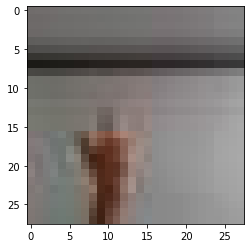

In [114]:
#이미지를 불러와 확인해봅니다

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### 모델 생성하기   
신경망을 만들고 train data를 학습시켜줍니다

In [115]:
#모델 만들기 파라메터설정

n_train_epoch=10

In [116]:
#모델 만들기 코드

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3))) #채널이 3개
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))    #클래스가 3개니까 출력층 3

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_15 (Dense)             (

왼쪽부터 층층히 쌓인다고 보면 되는코드죠?  
conv레이어 > maxpool레이어 > conv 레이어 > maxpooling 또하고 > 쫙펴주고 > 댄스~ > 결과레이어까지 댄스~  
이것들이 뭔지는 나중에 배울거같아요~~~

In [117]:
### 모델 만들었으면 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train, y_train, epochs=n_train_epoch)


Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 8.8951 - accuracy: 0.3100
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 2.2737 - accuracy: 0.3533
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.3723 - accuracy: 0.4667
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9252 - accuracy: 0.5900
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7561 - accuracy: 0.6633
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4117 - accuracy: 0.8500
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2963 - accuracy: 0.8933
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2243 - accuracy: 0.9367
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1597 - accuracy: 0.9667
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1022 - accuracy: 0.9933


### 테스트하기
테스트 데이터를 불러와, 학습이 잘 되었는지 확인합니다

In [118]:
#테스트 이미지 리사이즈

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [119]:
#테스트 이미지 불러오기

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)


print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

데이터의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


라벨:  0


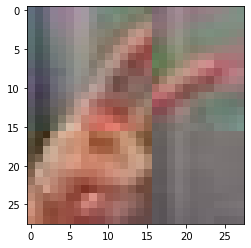

In [120]:
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

In [121]:
# 모델 시험코드

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)


10/10 - 0s - loss: 7.1524 - accuracy: 0.3333


### 학습과정 시각화  
Epoch의 진행에 따라 accuracy 와 loss의 변화를 나타냅니다  
또한, test loss와 test accuracy를 출력합니다

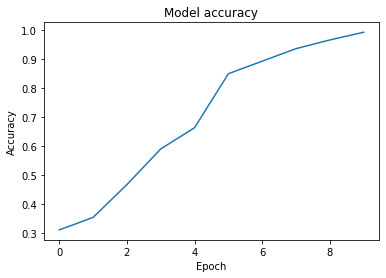

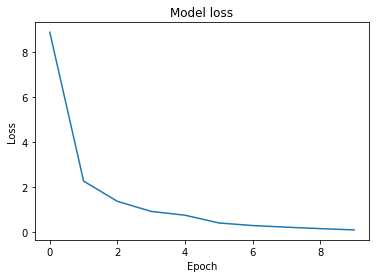

test_loss: 7.152368068695068 
test_accuracy: 0.3333333432674408


In [122]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

#### 33%의 정확도를 기록했습니다   
개선이 시급해보입니다

### 개선하기 : 정규화 사용  

In [123]:
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

In [124]:
#모델 학습부터 다시
### 모델 만들었으면 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_norm, y_train, epochs=n_train_epoch)


Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0846 - accuracy: 0.4267
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0725 - accuracy: 0.4067
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0588 - accuracy: 0.8300
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0390 - accuracy: 0.6867
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 1.0201 - accuracy: 0.5567
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.9916 - accuracy: 0.5733
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9501 - accuracy: 0.6933
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9212 - accuracy: 0.6700
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8609 - accuracy: 0.7200
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7812 - accuracy: 0.7967


In [125]:
#테스트하기
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)

10/10 - 0s - loss: 1.1830 - accuracy: 0.3333


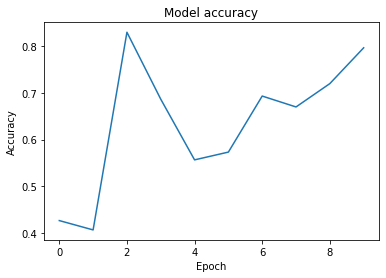

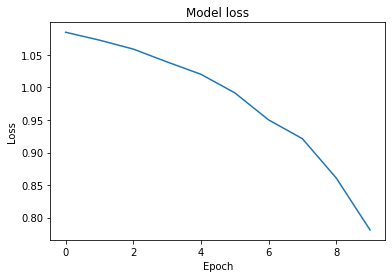

test_loss: 1.1829816102981567 
test_accuracy: 0.3333333432674408


In [126]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

###33%의 정확도를 기록했습니다   
los가 좀 작아지긴 했습니다  
개선이 필요합니다  

In [127]:
#그루 2n명의 데이터가 모였습니다
#리사이즈먼저

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train/paper"
resize_images(image_dir_path)


2467  images to be resized.
2467  images resized.
2504  images to be resized.
2504  images resized.
2401  images to be resized.
2401  images resized.


In [128]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/train"
(x_train_re, y_train_re)=load_data(image_dir_path, number_of_data = 2467 + 2504 + 2401)

print("x_train shape: {}".format(x_train_re.shape))
print("y_train shape: {}".format(y_train_re.shape))

데이터의 이미지 개수는 7372 입니다.
x_train shape: (7372, 28, 28, 3)
y_train shape: (7372,)


In [129]:
#아까 안썼던 파라메터도 설정해봅니다

n_channel_1=26
n_channel_2=32
n_dense=32
n_train_epoch=10
val_split=0.25

In [130]:
#모델 만들기 코드

model_re = keras.models.Sequential()
model_re.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3))) #채널이 3개
model_re.add(keras.layers.MaxPool2D(2,2))
model_re.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model_re.add(keras.layers.MaxPooling2D((2,2)))
model_re.add(keras.layers.Flatten())
model_re.add(keras.layers.Dense(n_dense, activation='relu'))
model_re.add(keras.layers.Dense(3, activation='softmax'))    #클래스가 3개니까 출력층 3

print('Model에 추가된 Layer 개수: ', len(model_re.layers))

model_re.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 26)        728       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 26)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 32)        7520      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_17 (Dense)             (

아까랑 입력한 유닛이 같은데 왜 파라메터수가 차이가 나지?  
이건 꼭 물어봐야겠어요  

In [131]:
#정규화해주고 
x_train_re_norm = x_train_re/255.0 

In [132]:
#다시 train, 데이터셋의 25%는 validation으로 쓰도록 합니다
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
history_re = model.fit(x_train_re_norm, y_train_re, epochs=n_train_epoch, validation_split = val_split)

Epoch 1/10
173/173 [==============================] - 1s 4ms/step - loss: 0.8739 - accuracy: 0.5862 - val_loss: 2.2064 - val_accuracy: 0.0125
Epoch 2/10
173/173 [==============================] - 1s 3ms/step - loss: 0.6499 - accuracy: 0.7410 - val_loss: 2.0343 - val_accuracy: 0.1058
Epoch 3/10
173/173 [==============================] - 1s 3ms/step - loss: 0.4839 - accuracy: 0.8322 - val_loss: 1.3871 - val_accuracy: 0.3755
Epoch 4/10
173/173 [==============================] - 1s 3ms/step - loss: 0.3801 - accuracy: 0.8709 - val_loss: 1.4190 - val_accuracy: 0.3760
Epoch 5/10
173/173 [==============================] - 1s 3ms/step - loss: 0.2996 - accuracy: 0.8958 - val_loss: 0.9348 - val_accuracy: 0.5990
Epoch 6/10
173/173 [==============================] - 1s 3ms/step - loss: 0.2416 - accuracy: 0.9168 - val_loss: 0.9638 - val_accuracy: 0.5920
Epoch 7/10
173/173 [==============================] - 1s 3ms/step - loss: 0.1974 - accuracy: 0.9334 - val_loss: 0.9270 - val_accuracy: 0.6294
Epoch 

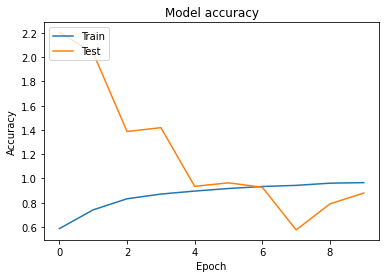

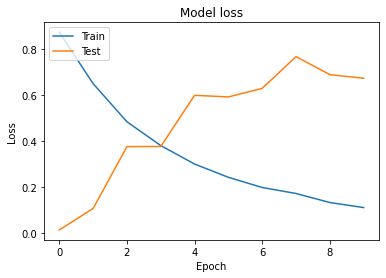

In [133]:

plt.plot(history_re.history['accuracy'])
plt.plot(history_re.history['val_loss'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history_re.history['loss'])
plt.plot(history_re.history['val_accuracy'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Validation의 accuracy가 train accuracy에 근접해가는 상황에서 학습이 종료되었습니다  
또한 loss는 더 낮아질 수 있는 가능성이 있는 것 같습니다  
epoch 10 이상을 테스트하여 개선할 수 있는 부분이 있을 것 같습니다  

In [135]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)

10/10 - 0s - loss: 0.1315 - accuracy: 0.9600


#### 개선한 모델은 96%의 정확도를 기록했습니다  

## 회고  
  
학습 데이터가 많을수록 정확히 분류할 수 있는 모델을 구축할 수 있음을 알았습니다  
(300개 , acc : 0.33 >>> 7000+개, acc : 0.96)  
다만, 테스트 데이터의 양이 크지 않아, 다른 테스트 데이터를 시도하여 범용적으로 모델의 동작을 증명해야 하는 숙제가 남은 듯 합니다  
(100개, aiffel 제공)  
  
카글 가위바위보 데이터셋 https://www.kaggle.com/datasets/sanikamal/rock-paper-scissors-dataset/code  
텐서플로 가위바위보 데이터셋 https://www.tensorflow.org/datasets/catalog/rock_paper_scissors  
을 활용하여, 모델의 범용성을 살펴보고 개선을 꾀하도록 하겠습니다  
  
또한, 모델 신경망층의 출력 (다음층의 입력) 유닛 수, epoch수 등 parameter를 조정하여, grid search로 최적의 모델을 찾을 수 있을 것이라 여겨지므로, 해당 방법을 수행해보겠습니다 
  
시각화 참고 : https://codetorial.net/tensorflow/visualize_training_history.html